<a href="https://colab.research.google.com/github/nelsonnolasco/Deep-Learning/blob/master/trabalho_final10_eurosat_Nelson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Aluno: Nelson de Campos Nolasco.

Disciplina: Deep Learning.

Professor: Rafael Glater.

<h1><center>EuroSAT - Classificação de imagens de satélite</center></h1>

Nesta atividade você deve treinar uma rede profunda para classificar imagens de satélite em 10 classes diferentes:

* Annual Crop
* Forest
* Herbaceous Vegetation
* Highway
* Industrial
* Pasture
* Permanent Crop
* Residential
* River
* Sea Lake


Para isso vamos usar o dataset EuroSAT com 27 mil imagens de satélite. Para mais informações: https://github.com/phelber/eurosat



# Imports

In [4]:
%tensorflow_version 2.x

In [5]:
import tensorflow as tf
import tensorflow_datasets as tfds
from matplotlib import pyplot as plt
import numpy as np

# Carregando o Dataset

In [6]:
images, labels = tfds.load('eurosat', as_supervised=True, batch_size=-1, split='train')

In [7]:
# Temos um total de 27 mil imagens. Vamos separar 20 mil imagens para treino e 7 mil para teste:

train_images = images[:20000]
train_labels = labels[:20000]

test_images = images[20000:]
test_labels = labels[20000:]

# Visualizando

Vamos ver as 15 primeiras imagens do dataset. Cada imagem tem dimensão 64x64:

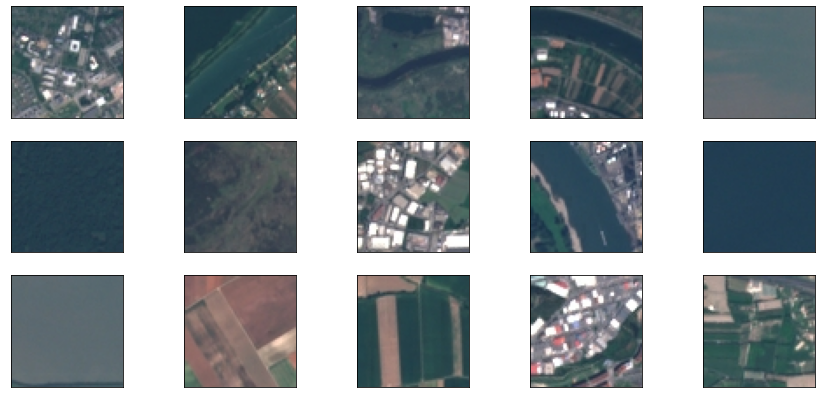

In [8]:
classes = ['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']

figure, plots = plt.subplots(ncols=5, nrows=3)
figure.set_size_inches(15, 7)
for i, item in enumerate(images[:15].numpy()):
    line = int(i>=5) + int(i>9)
    plots[line][i%5].imshow(item)
    plots[line][i%5].set_xticks([])
    plots[line][i%5].set_yticks([])
    plots[line][i%5].set_xlabel(classes[labels[i]], color='white', size=14)
plt.show()


# Criando o modelo

Vamos criar uma rede convolucional. Complete o modelo abaixo intercalando entre camadas de Conv2D e MaxPooling2D. Coloque esse par de camadas quantas vezes achar necessário. Não se esqueça do input_shape=(64, 64, 3) na primeira camada de convolução.

<br>

Dica: Comece com convoluções com filtros de tamanho 32 e vá dobrando este valor nas próximas camadas até chegar a 128. Qualquer dúvida consulte a atividade 4.


In [9]:
model = tf.keras.models.Sequential()
# -----------------------------------------------------
# Complete o modelo intercalando camadas:
# Conv2D(filtro, kernel)
# MaxPooling2D(pool_size)
#
# Termine com uma Conv2D
# -----------------------------------------------------
model.add(tf.keras.layers.Conv2D(32, (4, 4), activation='relu', input_shape=(64, 64, 3)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (4, 4), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(128, (4, 4), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))


model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])



# Treino

In [10]:
model.fit(train_images, train_labels, epochs=50, batch_size=50)

Epoch 1/50
400/400 [==============================] - 7s 17ms/step - loss: 1.7982 - accuracy: 0.5245
Epoch 2/50
400/400 [==============================] - 7s 16ms/step - loss: 0.8987 - accuracy: 0.6758
Epoch 3/50
400/400 [==============================] - 7s 16ms/step - loss: 0.7658 - accuracy: 0.7283
Epoch 4/50
400/400 [==============================] - 7s 16ms/step - loss: 0.6679 - accuracy: 0.7639
Epoch 5/50
400/400 [==============================] - 7s 16ms/step - loss: 0.5993 - accuracy: 0.7867
Epoch 6/50
400/400 [==============================] - 7s 16ms/step - loss: 0.5254 - accuracy: 0.8151
Epoch 7/50
400/400 [==============================] - 7s 16ms/step - loss: 0.4558 - accuracy: 0.8393
Epoch 8/50
400/400 [==============================] - 7s 16ms/step - loss: 0.4069 - accuracy: 0.8575
Epoch 9/50
400/400 [==============================] - 7s 16ms/step - loss: 0.3474 - accuracy: 0.8736
Epoch 10/50
400/400 [==============================] - 7s 16ms/step - loss: 0.3023 - accura

# Teste

Tente conseguir pelo menos 70% de acurácia no teste.

In [11]:
model.evaluate(test_images, test_labels)

219/219 [==============================] - 1s 7ms/step - loss: 1.8780 - accuracy: 0.7973


[1.8779942989349365, 0.7972857356071472]